# K-Means Clustering with Python



 - **K-means clustering** is one of the simplest and popular unsupervised machine learning algorithms.
 
 - Unsupervised algorithms make inferences from datasets using only input features without labelled outcomes or targets.
 
 - Group similar data points together and discover underlying patterns.
 
 - Real-life applications include Customer and market segmentation, recommender systems

# What is Clustering?

 - A cluster refers to a collection of data points aggregated together because of certain similarities.
 - You’ll need to define a **target number k**, which refers to the number of centroids you need in the dataset. 
 - **A centroid** represents the center of the cluster (or group).
 - Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
 

# Steps involved

 - Step 1 - Select the number of clusters (this is k, e.g. 3) you want to identify

 - Step 2 - Randomly select 3 distinct data points (initial clusters), which are the centroid
 - Step 3 - Measure the distance (based on Euclidean distance)between each point and the centroiod
 - Step 4 - Assign the 1st data point to the nearest cluster, then each of the data points
 - Step 5 - calculate the mean of each cluster as the new centroid
 - Step 6 - Repeat steps 3–5 with the new center of cluster (i.e centroid)
 - Step 7 - Repeat until no further changes

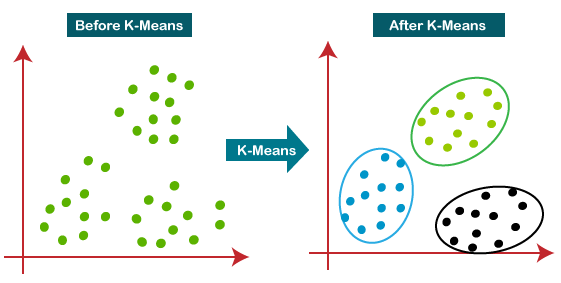

 - Image reference - https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning

# Choosing the K-value

 - To find the right number of clusters in the data, we need to run the K-Means clustering algorithm for different K values and compare the results.

## The Elbow method 

 - The elbow method is used to determine the optimal number of clusters in K-means clustering. 
 - The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. 
 - By default, the distortion score is computed, the sum of square distances from each point to its assigned center

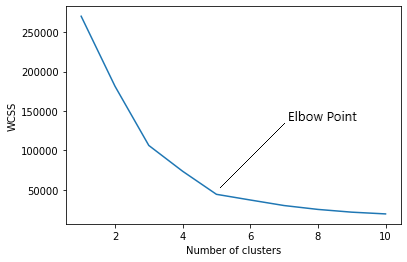

Image reference -https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

# Import Relevant Libraries

In [1]:
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

#style.use("seaborn")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') #ignore warnings

## To discuss

 - sklearn KMeans - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

 - MinMaxScaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


# Iris Dataset

In [2]:
iris_sns = sns.load_dataset('iris')
iris_sns.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


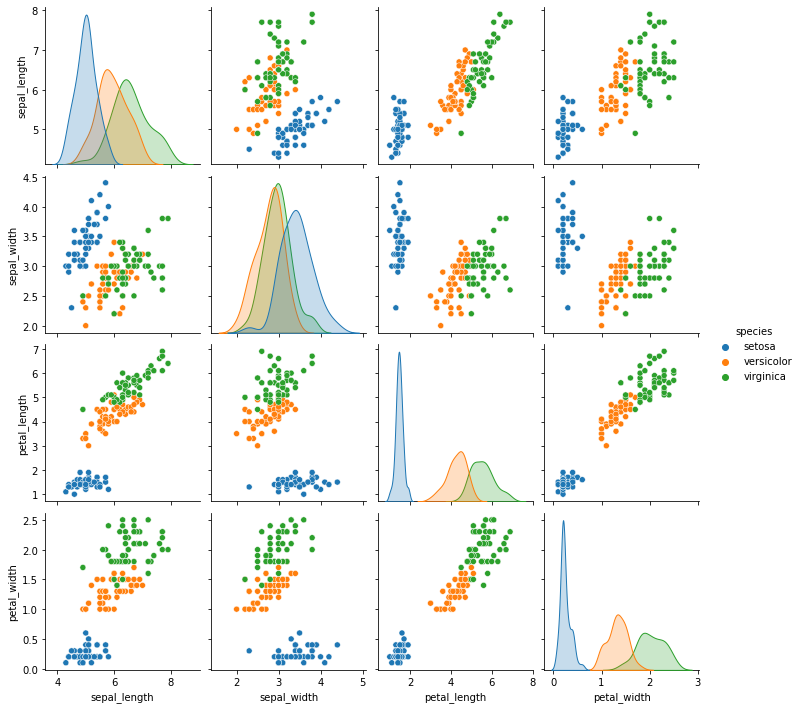

In [3]:
sns.pairplot(iris_sns, hue="species")

In [4]:
#Gives the counts of every value in the particular column..
iris_sns["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
iris = load_iris()
iris_df = pd.DataFrame(load_iris().data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.target #we'll compare these values later

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data_scaler = MinMaxScaler()

In [9]:
iris_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
iris_df_scaled = data_scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(iris_df_scaled, columns=iris.feature_names)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [11]:
#kmeans inertia_ attribute is: Sum of squared distances of samples to their closest cluster center.

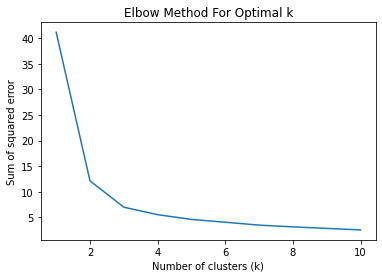

In [12]:
sse = []

for k in np.arange(1,11,1):
    km = KMeans(n_clusters=k)
    km.fit(iris_df_scaled)
    sse.append(km.inertia_)
    
##Get the 'optimal' value for k
plt.plot(range(1,11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
sse

[41.166110421373276,
 12.127790750538193,
 6.982216473785234,
 5.51693347204037,
 4.58977540011789,
 4.038571897818627,
 3.473693004090886,
 3.1330065115201013,
 2.8369119559455425,
 2.5374278478230092]

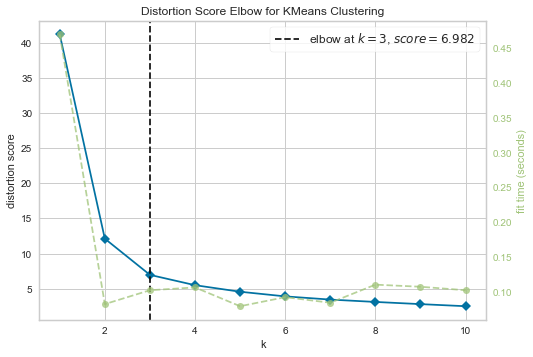

In [14]:
#! pip install yellowbrick 

#to install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and graph
model = KMeans()
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(iris_df_scaled)

#Create the graph
visualizer.show();


In [15]:
#k is 3

## Fitting k-means clusters is similar in process to the other regression models
## We need to fit our data then make predictions
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(iris_df_scaled)
    
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
iris_df_scaled["k-means_pred"] = y_kmeans  #creating a new column with the predicted values
iris_df_scaled["actual_values"] = iris_sns.species #creating a new column with the species

pd.crosstab(iris_df_scaled["actual_values"], iris_df_scaled["k-means_pred"])

k-means_pred,0,1,2
actual_values,,,
setosa,0,50,0
versicolor,47,0,3
virginica,14,0,36


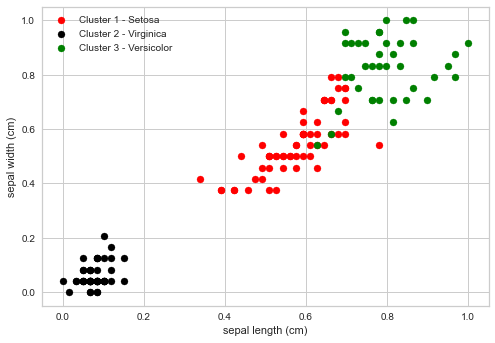

In [17]:
df1 = iris_df_scaled[iris_df_scaled["k-means_pred"]==0]
df2 = iris_df_scaled[iris_df_scaled["k-means_pred"]==1]
df3 = iris_df_scaled[iris_df_scaled["k-means_pred"]==2]

#Visualizing the cluster
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red', label = "Cluster 1 - Setosa")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black', label = "Cluster 2 - Virginica")
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='green', label = "Cluster 3 - Versicolor")

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend();

In [18]:
kmeans.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

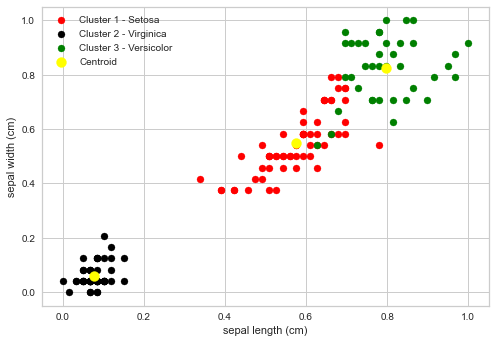

In [19]:
df1 = iris_df_scaled[iris_df_scaled["k-means_pred"]==0]
df2 = iris_df_scaled[iris_df_scaled["k-means_pred"]==1]
df3 = iris_df_scaled[iris_df_scaled["k-means_pred"]==2]

#Visualizing the cluster
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red', label = "Cluster 1 - Setosa")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black', label = "Cluster 2 - Virginica")
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='green', label = "Cluster 3 - Versicolor")

#Visualizing the centroid
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroid')


plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend();

In [20]:
#Gives the counts of every value in the particular column..
iris_sns["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

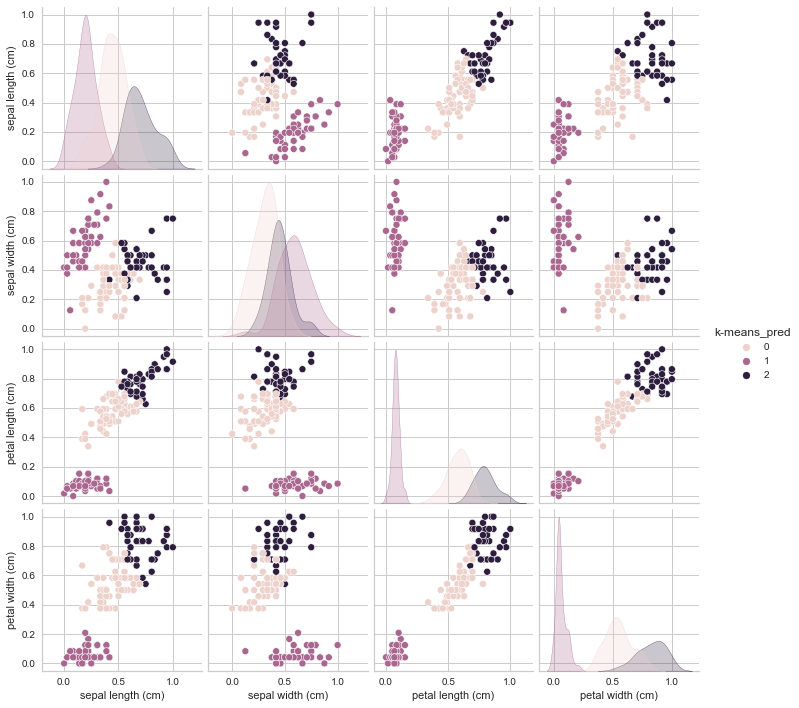

In [21]:
sns.pairplot(iris_df_scaled, hue="k-means_pred")

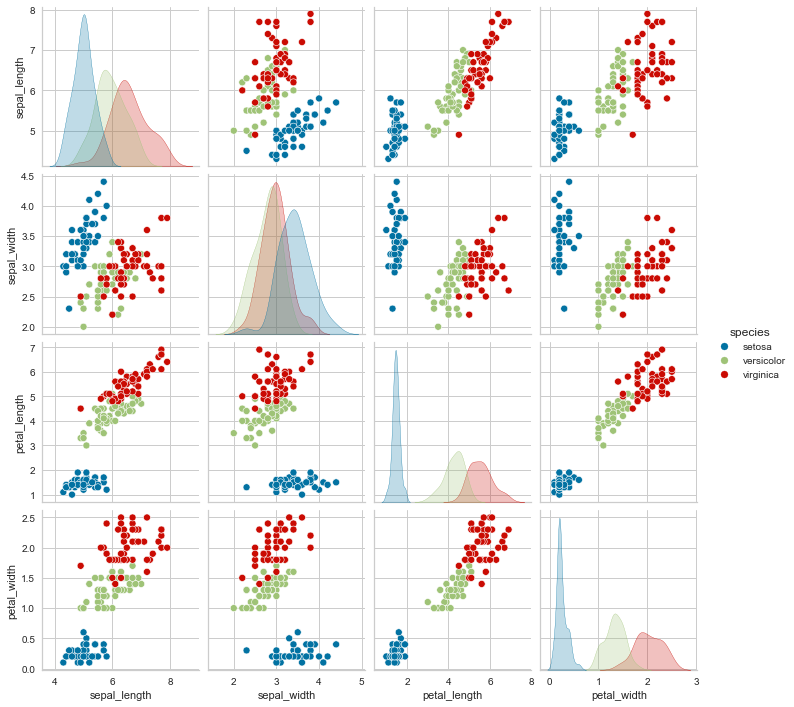

In [22]:
sns.pairplot(iris_sns, hue="species")

In [23]:
#iris = load_iris()
#iris_df = pd.DataFrame(data=data.data, columns=data.feature_names)
#iris_df["target"] = pd.Series(iris.target)
#iris_df.head()

# Customer Segmentation

Data Source - https://www.kaggle.com/code/vjchoudhary7/kmeans-clustering-in-customer-segmentation/data?select=Mall_Customers.csv 

**Read more**

In [24]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
features = dataset[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [26]:
features[:5,:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [27]:
features_scaled = data_scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=["age_scaled", "spending_scaled"])
features_scaled.head()

,age_scaled,spending_scaled
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [28]:
#kmeans inertia_ attribute is: Sum of squared distances of samples to their closest cluster center.

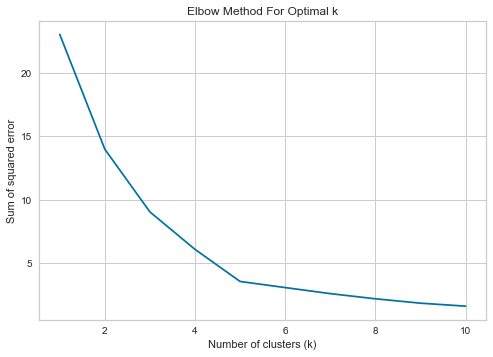

In [29]:
sse = []

for k in np.arange(1,11,1):
    km = KMeans(n_clusters=k)
    km.fit(features_scaled)
    sse.append(km.inertia_)
    
##Get the 'optimal' value for k
plt.plot(range(1,11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
sse

[23.040720326039903,
 13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.583117905952561,
 3.102392577861285,
 2.625650579133975,
 2.2180573120830718,
 1.873875095904132,
 1.6385507169024565]

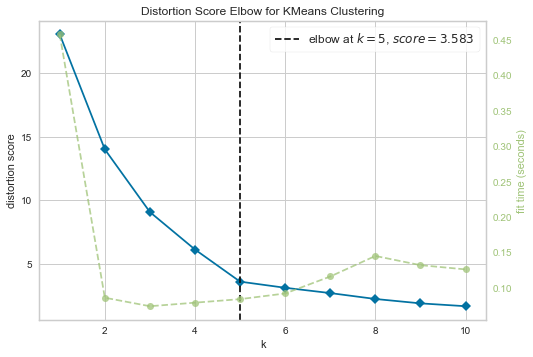

In [31]:
# Instantiate the clustering model and graph
model = KMeans()
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_scaled)

#Create the graph
visualizer.show();


In [32]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5)
y_kmeans= kmeansmodel.fit_predict(features_scaled)
y_kmeans

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [33]:
features_scaled.columns

Index(['age_scaled', 'spending_scaled'], dtype='object')

In [34]:
features_scaled[y_kmeans == 2].head()

,age_scaled,spending_scaled
0,0.000000,0.387755
2,0.008197,0.051020
4,0.016393,0.397959
6,0.024590,0.051020
8,0.032787,0.020408


In [35]:
features_scaled[y_kmeans == 3].head()

,age_scaled,spending_scaled
124,0.450820,0.285714
128,0.459016,0.102041
130,0.459016,0.081633
134,0.475410,0.040816
136,0.475410,0.061224


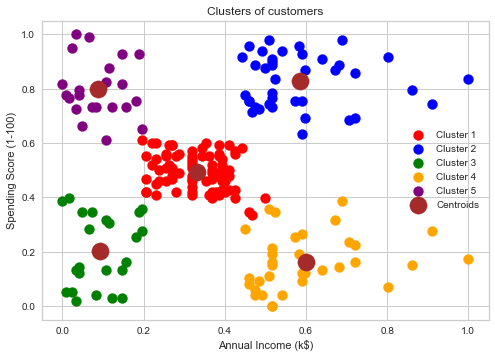

In [36]:
#Visualizing all the clusters 

plt.scatter(features_scaled[y_kmeans == 0]["age_scaled"], features_scaled[y_kmeans == 0]["spending_scaled"], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(features_scaled[y_kmeans == 1]["age_scaled"], features_scaled[y_kmeans == 1]["spending_scaled"], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(features_scaled[y_kmeans == 2]["age_scaled"], features_scaled[y_kmeans == 2]["spending_scaled"], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(features_scaled[y_kmeans == 3]["age_scaled"], features_scaled[y_kmeans == 3]["spending_scaled"], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(features_scaled[y_kmeans == 4]["age_scaled"], features_scaled[y_kmeans == 4]["spending_scaled"], s = 100, c = 'purple', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'brown', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Model Interpretation** 
 - Cluster 1 (Red Color) -> earning high but spending less
 - cluster 2 (Purple Color) -> average in terms of earning and spending 
 - cluster 3 (Green Color) -> earning high and also spending high
 - cluster 4 (Blue Color) -> earning less but spending more
 - Cluster 5 (Orange Color) -> Earning less , spending less

# Customer Segmentation Part 2

In [37]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [38]:
income = df["Income($)"]

In [39]:
km = KMeans(n_clusters=3)

In [40]:
km 

KMeans(n_clusters=3)

In [41]:
km.fit_predict(df[["Age", "Income($)"]])

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [42]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])

In [43]:
df["cluster"] = y_predicted

In [44]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [45]:
df[df["cluster"] == 0].head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0


In [46]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

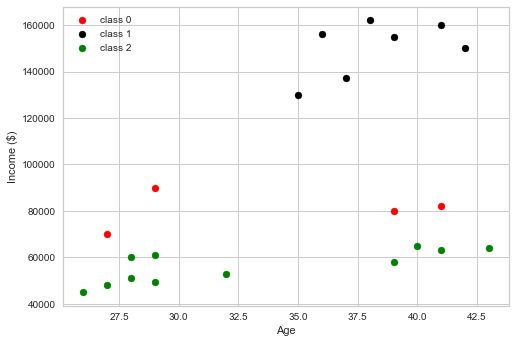

In [47]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='red', label = "class 0")
plt.scatter(df2.Age,df2['Income($)'],color='black',label = "class 1" )
plt.scatter(df3.Age,df3['Income($)'],color='green', label = "class 2")

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();

In [48]:
scaler = MinMaxScaler()

In [49]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)_scaled'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age_scaled'] = scaler.transform(df[['Age']])

In [50]:
df.head()

,Name,Age,Income($),cluster,Income($)_scaled,Age_scaled
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,0,0.384615,0.176471
2,Mohan,29,61000,2,0.136752,0.176471
3,Ismail,28,60000,2,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


In [51]:
df["Income($)_scaled"].describe()

count    22.000000
mean      0.388306
std       0.371846
min       0.000000
25%       0.115385
50%       0.192308
75%       0.771368
max       1.000000
Name: Income($)_scaled, dtype: float64

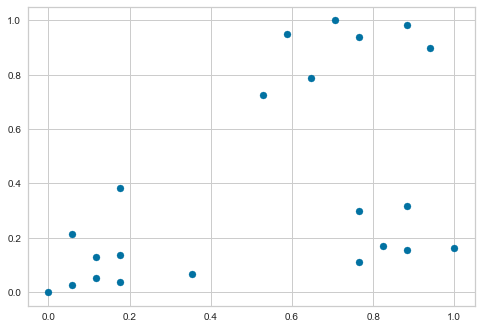

In [52]:
plt.scatter(df['Age_scaled'],df['Income($)_scaled'])

In [53]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age_scaled','Income($)_scaled']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [54]:
df['cluster']=y_predicted

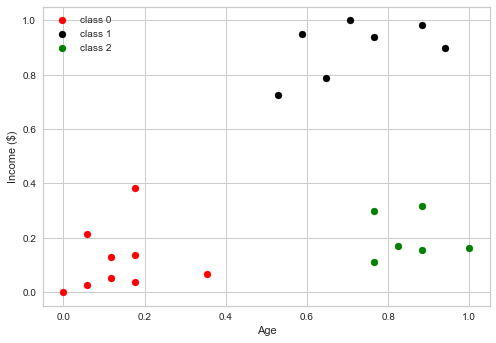

In [55]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age_scaled'],df1['Income($)_scaled'],color='red', label = "class 0")
plt.scatter(df2['Age_scaled'],df2['Income($)_scaled'],color='black',label = "class 1" )
plt.scatter(df3['Age_scaled'],df3['Income($)_scaled'],color='green', label = "class 2")

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();

In [56]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [57]:
km.cluster_centers_[:,0]

array([0.1372549 , 0.72268908, 0.85294118])

In [58]:
km.cluster_centers_[:,1]

array([0.11633428, 0.8974359 , 0.2022792 ])

In [59]:
centroid = pd.DataFrame(km.cluster_centers_, columns=["x_axis", "y_axis"])

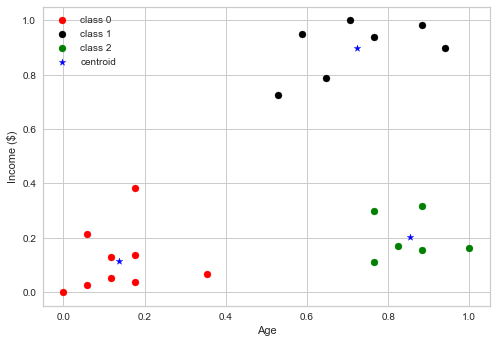

In [60]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age_scaled'],df1['Income($)_scaled'],color='red', label = "class 0")
plt.scatter(df2['Age_scaled'],df2['Income($)_scaled'],color='black',label = "class 1" )
plt.scatter(df3['Age_scaled'],df3['Income($)_scaled'],color='green', label = "class 2")


plt.scatter(centroid["x_axis"], centroid["y_axis"], color="blue", label="centroid", marker="*")

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();

In [61]:
import numpy as np 

In [62]:
k_range = np.arange(1,11,1) 

In [63]:
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [64]:
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age_scaled','Income($)_scaled']])
    sse.append(km.inertia_)

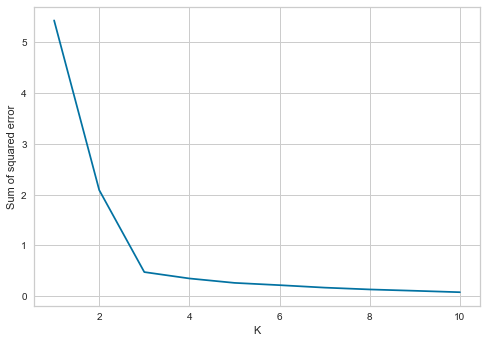

In [65]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [66]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.2173393510545642,
 0.16869711728567788,
 0.1327661931978319,
 0.10629897421405132,
 0.07831232180040332]

# References

- Machine Learning Tutorial Python - 13: K Means Clustering Algorithm - https://youtu.be/EItlUEPCIzM 
- Understanding K-means Clustering in Machine Learning - https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
- Elbow Method - https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#:~:text=The%20elbow%20method%20runs%20k,point%20to%20its%20assigned%20center. 
- Cluster Analysis - https://github.com/alexandrehsd/Cluster-Analysis/blob/master/Cluster%20Analysis.ipynb
- varshajaiswal062/Kmeans_Clustering - https://github.com/varshajaiswal062/Kmeans_Clustering/blob/main/Task2.ipynb
- KMeans/KMeans_Clustering_Iris_Dataset.ipynb - https://github.com/Reema-B/KMeans/blob/main/KMeans_Clustering_Iris_Dataset.ipynb
- KMeans Clustering in Customer Segmentation - https://www.kaggle.com/code/vjchoudhary7/kmeans-clustering-in-customer-segmentation/notebook